<h1 style="text-align:center;">Лабораторная работа №5</h1>

<h3 style="text-align:center;">Осипов Алексей Б01-204</h3>

**Цель**: получить численное решение уравнения переноса следующими схемами:

1. Уголок
2. Прямоугольник
3. Схема Лакса - Вендроффа

Провести исследование на сходимость, проанализировать порядок аппроксимации (сходимости), построить график с убыванием нормы ошибки в зависимости от шага интегрирования в логарифмическом масштабе

$$
\begin{cases}
u_t + a\,u_x = 0,\\[6pt]
u(x,0) = u_0(x) = cos\bigl(2\,\pi\,x\bigr)
\end{cases}
$$


**Аналитическое решение уравнения:**
$$
u(x,t) \;=\; u_0\bigl(x - a\,t\bigr)
\;=\;
\cos\!\Bigl(2\pi\,(x - a\,t)\Bigr)
$$


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

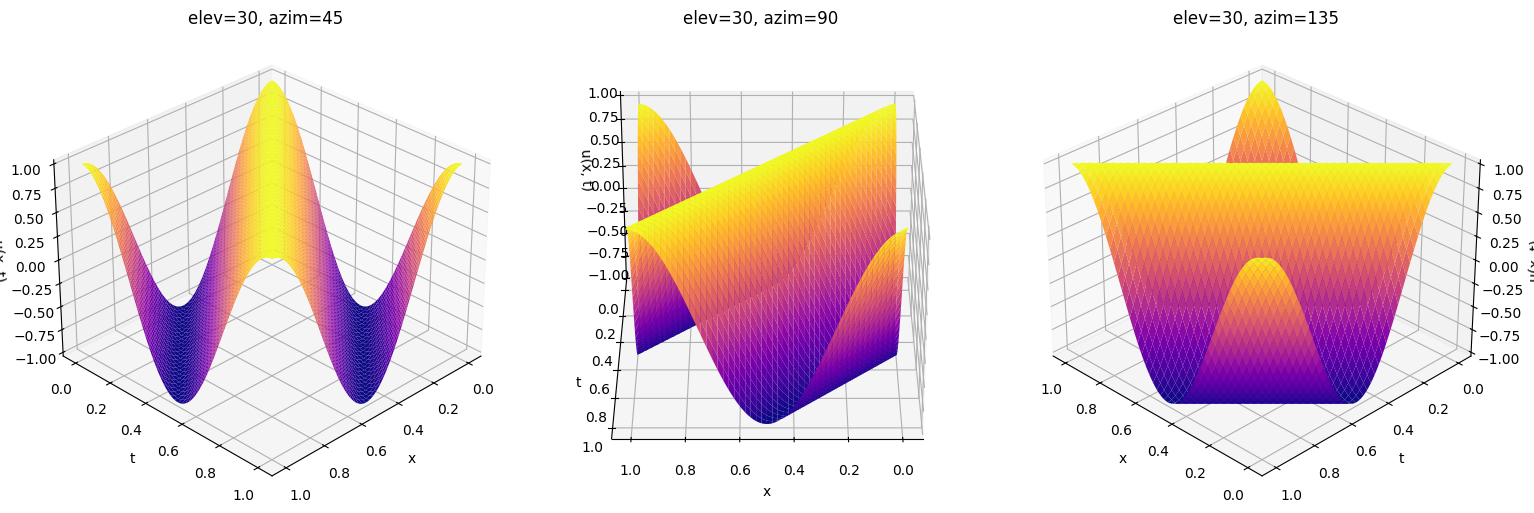

In [20]:
# Параметры
a = 1.0 # Скорость переноса

X = 1.0
T = 1.0

N = 1000
M = 1000

# Сетка
x = np.linspace(0, X, N, endpoint=False)
t = np.linspace(0, T, M)
X_grid, T_grid = np.meshgrid(x, t, indexing='xy')

U = np.cos(2 * np.pi * (X_grid - a * T_grid))

angles = [(30, 45), (30, 90), (30, 135)]  # (elev, azim) для трёх ракурсов

fig = plt.figure(figsize=(15, 5))
for i, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.plot_surface(X_grid, T_grid, U, cmap='plasma', edgecolor='none')
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f"elev={elev}, azim={azim}")
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    ax.set_zlabel("u(x, t)")

plt.tight_layout()
plt.show()


<h3 style="text-align:center;">Уголок</h3>


$$
u_i^{\,n+1} \;=\;
u_i^{\,n}
\;-\;
\frac{a\,\Delta t}{\Delta x}\,\bigl(u_i^{\,n} - u_{i-1}^{\,n}\bigr).
$$

**Порядок аппроксимации:** $O(\Delta x) + O(\Delta t)$


C:\Users\osale\AppData\Local\Temp\ipykernel_17204\2172286130.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


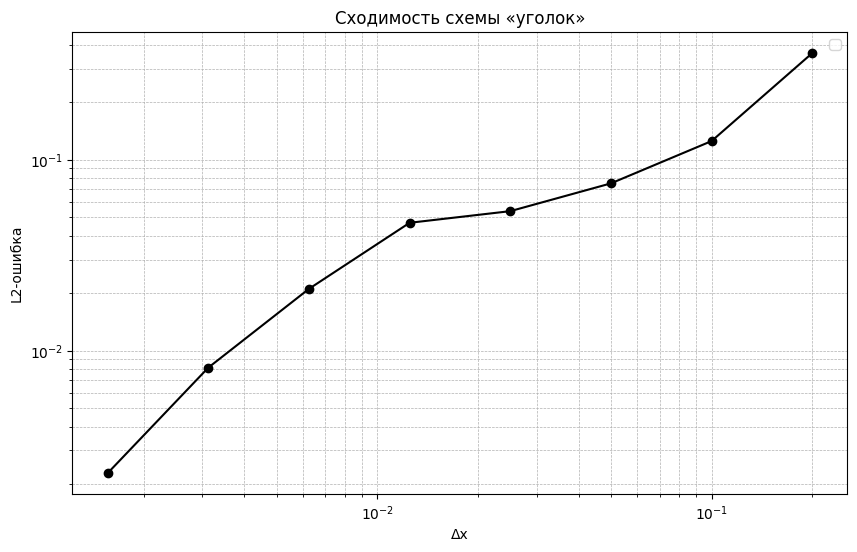

Порядок аппроксимации ≈ 0.912


In [73]:
def corner(N, T, a, C):

    x = np.linspace(0, 1, N, endpoint=False)
    dx = x[1] - x[0]
    dt = C * dx / a
    Nt = int(T / dt)

    # Начальное условие
    u = np.cos(2 * np.pi * x)

    # Схема уголок
    for n in range(Nt):
        u_new = u.copy()
        for i in range(N):
            u_new[i] = u[i] - (a * dt / dx) * (u[i] - u[i - 1])
        u = u_new

    # Аналитическое решение
    x_shifted = (x - a * T) % 1.0
    u_analit = np.cos(2 * np.pi * x_shifted)

    # L2-ошибка
    error = np.sqrt(np.sum((u - u_analit) ** 2) * dx)

    return dx, error, x, u, u_analit

# Исследование сходимости
Ns = [5, 10, 20, 40, 80, 160, 320, 640]
deltas, errors = [], []

C = 0.9
for N in Ns:
    dx, err, _, _, _ = corner(N, T, a, C)
    deltas.append(dx)
    errors.append(err)

# График сходимости
plt.figure(figsize=(10, 6))
plt.loglog(deltas, errors, 'o-', color='black')
plt.xlabel('Δx')
plt.ylabel('L2-ошибка')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('Сходимость схемы «уголок»')
plt.show()

# Аппроксимация порядка
logs_dx = np.log(deltas)
logs_err = np.log(errors)
slope, intercept, *_ = linregress(logs_dx, logs_err)
print(f"Порядок аппроксимации ≈ {slope:.3f}")

<h3 style="text-align:center;">Прямоугольник</h3>

$$
u_i^{\,n+1}
=
u_i^{\,n}
\;-\;
\frac{a\,\Delta t}{2\,\Delta x}\,
\bigl(u_{i+1}^{\,n} - u_{i-1}^{\,n}\bigr).
$$

**Порядок аппроксимации:** $O(\Delta x^2) + O(\Delta t)$

C:\Users\osale\AppData\Local\Temp\ipykernel_17204\3491710560.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


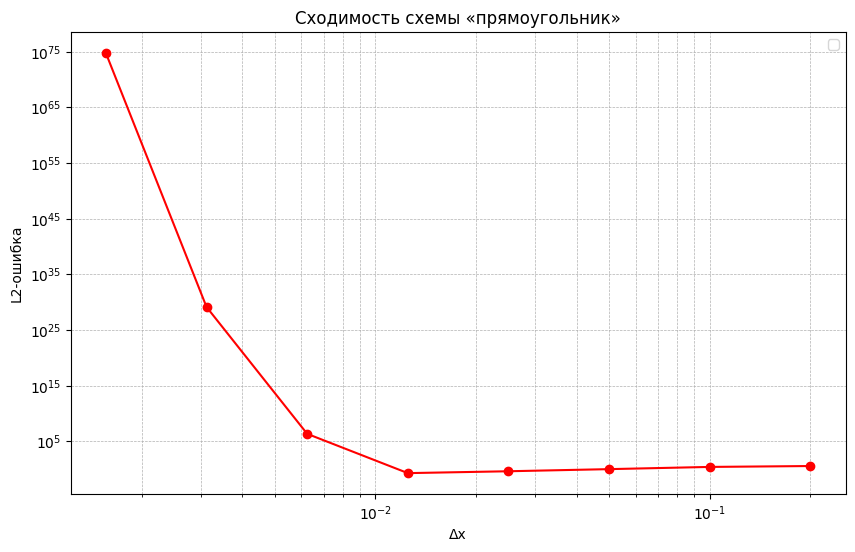

Порядок аппроксимации ≈ -26.953


In [ ]:
C = 0.9

def rectangle(N, T, a, C):
    # Сетка
    x = np.linspace(0, 1, N, endpoint=False)
    dx = x[1] - x[0]
    dt = C * dx / abs(a)
    Nt = int(T / dt)

    # Начальное условие
    u = np.cos(2 * np.pi * x)

    # Схема «прямоугольник»
    for n in range(Nt):
        u_new = u.copy()
        for i in range(N):
            u_new[i] = u[i] - (a * dt / (2 * dx)) * (u[(i + 1) % N] - u[i - 1])
        u = u_new

    # Аналитическое решение
    x_shifted = (x - a * T) % 1.0
    u_exact = np.cos(2 * np.pi * x_shifted)

    # L2-ошибка
    error = np.sqrt(np.sum((u - u_exact) ** 2) * dx)

    return dx, error

# Исследование сходимости
Ns = [5, 10, 20, 40, 80, 160, 320, 640]
deltas, errors = [], []

for N in Ns:
    dx, err = rectangle(N, T, a, C)
    deltas.append(dx)
    errors.append(err)

# График сходимости
plt.figure(figsize=(10, 6))
plt.loglog(deltas, errors, 'o-', color='red')
plt.xlabel('Δx')
plt.ylabel('L2-ошибка')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('Сходимость схемы «прямоугольник»')
plt.show()

# Оценка порядка аппроксимации
logs_dx = np.log(deltas)
logs_err = np.log(errors)
slope, _, _, _, _ = linregress(logs_dx, logs_err)
print(f"Порядок аппроксимации ≈ {slope:.3f}")


Как видно из графика, прямоугольник не является устойчивой схемой для уравнения переноса. Даже при числе Куранта $C \le 1$ решение улетает в космос, а ошибки экспоненциально растут, так что единственный выход это сделать $C$ очень маленьким, чтобы рост ошибки успевал компенсироваться засчёт высокой точности

C:\Users\osale\AppData\Local\Temp\ipykernel_17204\2544444751.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


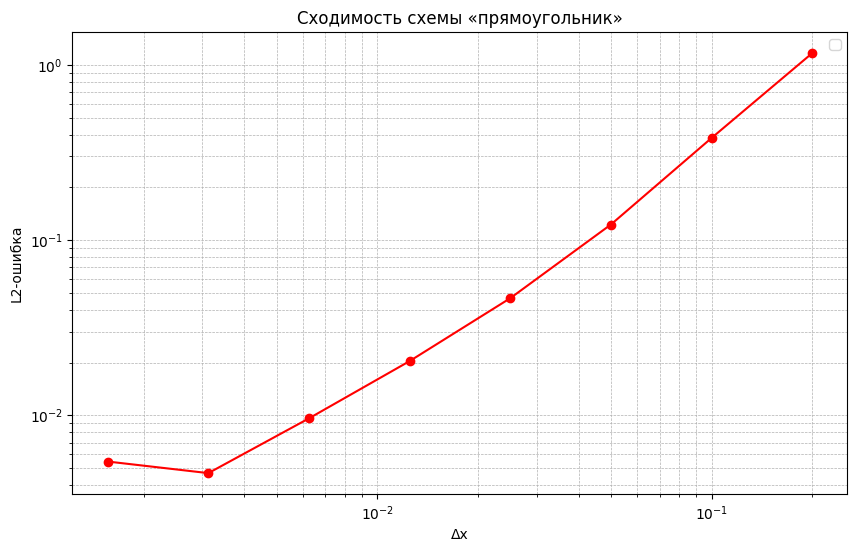

Порядок аппроксимации ≈ 1.168


In [ ]:
C = 0.1

def rectangle(N, T, a, C):
    # Сетка
    x = np.linspace(0, 1, N, endpoint=False)
    dx = x[1] - x[0]
    dt = C * dx / abs(a)
    Nt = int(T / dt)

    # Начальное условие
    u = np.cos(2 * np.pi * x)

    # Схема «прямоугольник»
    for n in range(Nt):
        u_new = u.copy()
        for i in range(N):
            u_new[i] = u[i] - (a * dt / (2 * dx)) * (u[(i + 1) % N] - u[i - 1])
        u = u_new

    # Аналитическое решение
    x_shifted = (x - a * T) % 1.0
    u_exact = np.cos(2 * np.pi * x_shifted)

    # L2-ошибка
    error = np.sqrt(np.sum((u - u_exact) ** 2) * dx)

    return dx, error

# Исследование сходимости
Ns = [5, 10, 20, 40, 80, 160, 320, 640]
deltas, errors = [], []

for N in Ns:
    dx, err = rectangle(N, T, a, C)
    deltas.append(dx)
    errors.append(err)

# График сходимости
plt.figure(figsize=(10, 6))
plt.loglog(deltas, errors, 'o-', color='red')
plt.xlabel('Δx')
plt.ylabel('L2-ошибка')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('Сходимость схемы «прямоугольник»')
plt.show()

# Оценка порядка аппроксимации
logs_dx = np.log(deltas)
logs_err = np.log(errors)
slope, _, _, _, _ = linregress(logs_dx, logs_err)
print(f"Порядок аппроксимации ≈ {slope:.3f}")


<h3 style="text-align:center;">Схема Лакса - Вендроффа</h3>



$$
u_i^{\,n+1}
=
u_i^{\,n}
\;-\;
\frac{a\,\Delta t}{2\,\Delta x}\,\left(u_{i+1}^{\,n} - u_{i-1}^{\,n}\right)
\;+\;
\frac{(a\,\Delta t)^2}{2\,\Delta x^2}\,\left(u_{i+1}^{\,n} - 2u_i^{\,n} + u_{i-1}^{\,n}\right)
$$

**Порядок аппроксимации:** $O(\Delta t^2) + O(\Delta x^2)$


C:\Users\osale\AppData\Local\Temp\ipykernel_17204\1483181022.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


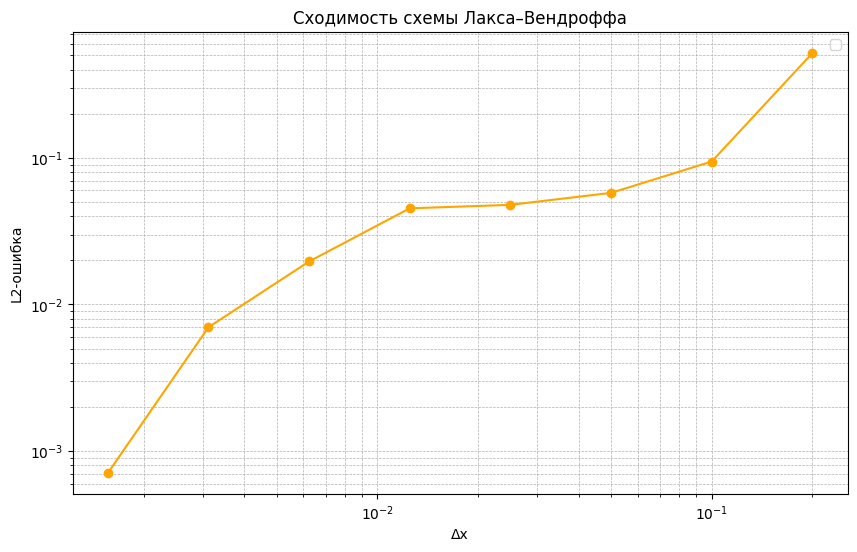

Порядок аппроксимации ≈ 1.073


In [ ]:
C = 0.9

def lax_wendroff(N, T, a, C):
    # Сетка
    x = np.linspace(0, 1, N, endpoint=False)
    dx = x[1] - x[0]
    dt = C * dx / abs(a)
    Nt = int(T / dt)

    # Начальное условие
    u = np.cos(2 * np.pi * x)

    # Схема Лакса–Вендроффа
    for n in range(Nt):
        u_p = np.roll(u, -1)
        u_m = np.roll(u, 1)
        u = u - 0.5 * (a * dt / dx) * (u_p - u_m) \
              + 0.5 * (a * dt / dx)**2 * (u_p - 2 * u + u_m)

    # Аналитическое решение
    x_shifted = (x - a * T) % 1.0
    u_exact = np.cos(2 * np.pi * x_shifted)

    # L2-ошибка
    error = np.sqrt(np.sum((u - u_exact) ** 2) * dx)

    return dx, error

# Исследование сходимости
Ns = [5, 10, 20, 40, 80, 160, 320, 640]
deltas, errors = [], []

for N in Ns:
    dx, err = lax_wendroff(N, T, a, C)
    deltas.append(dx)
    errors.append(err)

# График сходимости
plt.figure(figsize=(10, 6))
plt.loglog(deltas, errors, 'o-', color='orange')
plt.xlabel('Δx')
plt.ylabel('L2-ошибка')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('Сходимость схемы Лакса–Вендроффа')
plt.show()

# Оценка порядка аппроксимации
logs_dx = np.log(deltas)
logs_err = np.log(errors)
slope, _, _, _, _ = linregress(logs_dx, logs_err)
print(f"Порядок аппроксимации ≈ {slope:.3f}")

А теперь сравним разные схемы

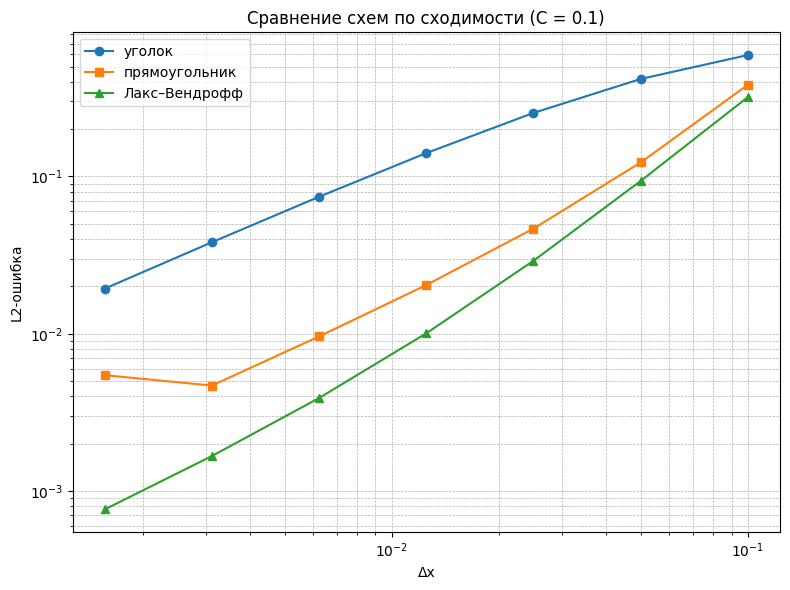

In [ ]:
#Скопирую сюда функции, чтобы не ошибиться
# Общие параметры
a = 1.0
T = 1.0
C = 0.1

# Аналитическое решение
def analytic_solution(x, a, T):
    x_shifted = (x - a * T) % 1.0
    return np.cos(2 * np.pi * x_shifted)

# Схема уголок
def corner(N, T, a, C):
    x = np.linspace(0, 1, N, endpoint=False)
    dx = x[1] - x[0]
    dt = C * dx / a
    Nt = int(T / dt)
    u = np.cos(2 * np.pi * x)
    for _ in range(Nt):
        u_new = u.copy()
        for i in range(N):
            u_new[i] = u[i] - (a * dt / dx) * (u[i] - u[i - 1])
        u = u_new
    u_exact = analytic_solution(x, a, T)
    error = np.sqrt(np.sum((u - u_exact) ** 2) * dx)
    return dx, error

# Схема прямоугольник
def rectangle(N, T, a, C):
    x = np.linspace(0, 1, N, endpoint=False)
    dx = x[1] - x[0]
    dt = C * dx / a
    Nt = int(T / dt)
    u = np.cos(2 * np.pi * x)
    for _ in range(Nt):
        u_new = u.copy()
        for i in range(N):
            u_new[i] = u[i] - (a * dt / (2 * dx)) * (u[(i + 1) % N] - u[i - 1])
        u = u_new
    u_exact = analytic_solution(x, a, T)
    error = np.sqrt(np.sum((u - u_exact) ** 2) * dx)
    return dx, error

# Схема Лакс–Вендрофф
def lax_wendroff(N, T, a, C):
    x = np.linspace(0, 1, N, endpoint=False)
    dx = x[1] - x[0]
    dt = C * dx / a
    Nt = int(T / dt)
    u = np.cos(2 * np.pi * x)
    for _ in range(Nt):
        u_p = np.roll(u, -1)
        u_m = np.roll(u, 1)
        u = u - 0.5 * (a * dt / dx) * (u_p - u_m) + 0.5 * (a * dt / dx)**2 * (u_p - 2 * u + u_m)
    u_exact = analytic_solution(x, a, T)
    error = np.sqrt(np.sum((u - u_exact) ** 2) * dx)
    return dx, error

# Исследование
Ns = [10, 20, 40, 80, 160, 320, 640]
corner_errs, rect_errs, lw_errs = [], [], []
dxs = []

for N in Ns:
    dx, err1 = corner(N, T, a, C)
    _,  err2 = rectangle(N, T, a, C)
    _,  err3 = lax_wendroff(N, T, a, C)
    dxs.append(dx)
    corner_errs.append(err1)
    rect_errs.append(err2)
    lw_errs.append(err3)

# График
plt.figure(figsize=(8, 6))
plt.loglog(dxs, corner_errs, 'o-', label='уголок')
plt.loglog(dxs, rect_errs, 's-', label='прямоугольник')
plt.loglog(dxs, lw_errs, '^-', label='Лакс–Вендрофф')
plt.xlabel("Δx")
plt.ylabel("L2-ошибка")
plt.title("Сравнение схем по сходимости (C = 0.1)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


**ИТОГ**

При одинаковом числе Куранта схема Лакса - Вендроффа показала себя наиболее точной😎 А вот схема прямоугольник сходится только при маленьких $C$